In [4]:
#small dataset
import numpy as np  
import pandas as pd

usptodata = pd.read_csv('U.S. Patents.csv')
usptodataset=usptodata[["grant_id","claims_text","abstract"]]
usptodataset= usptodata.dropna()
US_Patent_df = usptodataset.reset_index(drop=True)
US_Patent_df= US_Patent_df[['grant_id','abstract']]
US_Patent_df

,grant_id,abstract
0,USPP030977,"A new and distinct variety of Mango plant, her..."
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun..."
3,USPP030980,This invention relates to a new and distinct v...
4,USPP030981,A new and distinct cultivar of Strawberry plan...
...,...,...
7008,US10462947,Provided are a first component holding tool op...
7009,US10462948,In a case in which mounting deviation is occur...
7010,US10462949,A reel holding device is provided. The device ...
7011,US10462950,An electronic component bonding device include...


In [5]:
def cleantext(df): 
    
    US_Patent_df['cleaned_text'] = US_Patent_df['abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].str.lower()
    
    #remove numbers
    US_Patent_df['cleaned_text'] =US_Patent_df['cleaned_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'https.*$', "", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("   ", " ", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("  ", " ", regex = True)
   
    return US_Patent_df

df = cleantext(US_Patent_df)

In [6]:
#remove stopwords and words_to_remove
import nltk
stopwords = nltk.corpus.stopwords.words('english')
df['cleaned_text_without_Stopwprd'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]))
df

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...
...,...,...,...,...
7008,US10462947,Provided are a first component holding tool op...,provided are a first component holding tool op...,provided first component holding tool operatin...
7009,US10462948,In a case in which mounting deviation is occur...,in a case in which mounting deviation is occur...,case mounting deviation occurring component mo...
7010,US10462949,A reel holding device is provided. The device ...,a reel holding device is provided the device i...,reel holding device provided device includes c...
7011,US10462950,An electronic component bonding device include...,an electronic component bonding device include...,electronic component bonding device includes m...


In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["Lemmatization"] = df["cleaned_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd,Lemmatization
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...,new distinct variety mango plant herein referr...
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...,x honeysuckle rose x new variety derived x sim...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...,new distinct peach tree variety prunus persica...
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...,invention relates new distinct variety red ras...
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...,new distinct cultivar strawberry plant named x...
...,...,...,...,...,...
7008,US10462947,Provided are a first component holding tool op...,provided are a first component holding tool op...,provided first component holding tool operatin...,provided first component holding tool operatin...
7009,US10462948,In a case in which mounting deviation is occur...,in a case in which mounting deviation is occur...,case mounting deviation occurring component mo...,case mounting deviation occurring component mo...
7010,US10462949,A reel holding device is provided. The device ...,a reel holding device is provided the device i...,reel holding device provided device includes c...,reel holding device provided device includes c...
7011,US10462950,An electronic component bonding device include...,an electronic component bonding device include...,electronic component bonding device includes m...,electronic component bonding device includes m...


In [ ]:
#Document Embedding

In [7]:
# SBert
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

                  
# Initiate BERTopic
topic_model_SBERT = BERTopic(embedding_model=sentence_model)

# Run BERTopic model
topics, probabilities = topic_model_SBERT.fit_transform(df['Lemmatization']) 

In [10]:
df_SBERT=topic_model_SBERT.get_topic_info()

In [11]:
df_SBERT

,Topic,Count,Name
0,-1,3040,-1_device_system_first_one
1,0,332,0_composition_acid_invention_protein
2,1,259,1_semiconductor_layer_gate_substrate
3,2,225,2_wireless_station_communication_network
4,3,209,3_image_pixel_imaging_object
...,...,...,...
80,79,13,79_gradient_resonance_pulse_magnetic
81,80,12,80_battery_balancing_current_voltage
82,81,12,81_amplifier_stage_cascode_transistor
83,82,11,82_xray_xrays_detector_tube


In [14]:
#Hugging Face
from bertopic import BERTopic
from transformers.pipelines import pipeline

hf_model = pipeline("feature-extraction", model="distilroberta-base")

                  
# Initiate BERTopic
topic_model_HF = BERTopic(embedding_model=hf_model)

# Run BERTopic model
topics, probabilities = topic_model_HF.fit_transform(df['Lemmatization']) 

# Get the list of topics
df_hf=topic_model_HF.get_topic_info()
df_hf

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,Topic,Count,Name
0,0,6769,0_first_second_device_one
1,1,200,1_first_surface_least_second
2,2,28,2_plant_new_habit_characterized
3,3,16,3_soybean_plant_cultivar_variety


In [15]:
# flair Document Pool Embeddings
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings

# initialize the word embeddings
glove_embedding = WordEmbeddings('glove')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding])

2023-01-21 11:04:09,883 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to C:\Users\admin\AppData\Local\Temp\tmp_g_2chiv


100%|████████████████████████████████████████████████████████████████| 160000128/160000128 [00:47<00:00, 3347018.39B/s]

2023-01-21 11:04:57,870 copying C:\Users\admin\AppData\Local\Temp\tmp_g_2chiv to cache at C:\Users\admin\.flair\embeddings\glove.gensim.vectors.npy


2023-01-21 11:04:57,952 removing temp file C:\Users\admin\AppData\Local\Temp\tmp_g_2chiv
2023-01-21 11:04:58,121 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to C:\Users\admin\AppData\Local\Temp\tmpk_u5qbla


100%|██████████████████████████████████████████████████████████████████| 21494764/21494764 [00:06<00:00, 3359127.08B/s]

2023-01-21 11:05:04,675 copying C:\Users\admin\AppData\Local\Temp\tmpk_u5qbla to cache at C:\Users\admin\.flair\embeddings\glove.gensim
2023-01-21 11:05:04,690 removing temp file C:\Users\admin\AppData\Local\Temp\tmpk_u5qbla


In [16]:
# Initiate BERTopic
topic_model_Pool = BERTopic(embedding_model=document_embeddings)

# Run BERTopic model
topics, probabilities = topic_model_Pool.fit_transform(df['Lemmatization']) 

# Get the list of topics
df_pool=topic_model_Pool.get_topic_info()
df_pool

,Topic,Count,Name
0,0,6735,0_first_second_device_one
1,1,233,1_first_second_sub_surface
2,2,25,2_plant_new_habit_characterized
3,3,20,3_soybean_plant_cultivar_variety


In [17]:
#Flair Document RNN Embeddings

from flair.embeddings import WordEmbeddings, DocumentRNNEmbeddings

glove_embedding = WordEmbeddings('glove')

document_embeddings_RNN = DocumentRNNEmbeddings([glove_embedding])

# Initiate BERTopic
topic_model_RNN = BERTopic(embedding_model=document_embeddings_RNN)

# Run BERTopic model
topics, probabilities = topic_model_RNN.fit_transform(df['Lemmatization']) 

# Get the list of topics
df_RNN=topic_model_RNN.get_topic_info()
df_RNN

,Topic,Count,Name
0,-1,1051,-1_first_second_method_system
1,0,257,0_device_wireless_content_client
2,1,124,1_provided_variety_soybean_also
3,2,113,2_time_period_interval_number
4,3,108,3_search_prereading_rendezvous_determination
...,...,...,...
186,185,11,185_sock_toe_epilayers_removed
187,186,11,186_film_silicon_flattening_protective
188,187,11,187_acid_topical_oral_nucleic
189,188,11,188_claimed_puf_name_rivet


In [19]:
#Flair TransformerDocumentEmbeddings
from flair.embeddings import TransformerDocumentEmbeddings

# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')

# Initiate BERTopic
topic_model_roberta = BERTopic(embedding_model=roberta_model)

# Run BERTopic model
topics, probabilities = topic_model_roberta.fit_transform(df['Lemmatization']) 

# Get the list of topics
df_roberta=topic_model_roberta.get_topic_info()
df_roberta

,Topic,Count,Name
0,-1,1,-1_irradiation_scanning_raster_method
1,0,6813,0_first_second_device_one
2,1,158,1_least_surface_first_one
3,2,24,2_plant_new_habit_characterized
4,3,17,3_soybean_plant_cultivar_variety


In [20]:
#flair SentenceTransformerDocumentEmbeddings
from flair.data import Sentence
from flair.embeddings import SentenceTransformerDocumentEmbeddings

# init embedding
embedding = SentenceTransformerDocumentEmbeddings('bert-base-nli-mean-tokens')

# Initiate BERTopic
topic_model_ST = BERTopic(embedding_model=embedding)

# Run BERTopic model
topics, probabilities = topic_model_ST.fit_transform(df['Lemmatization']) 

# Get the list of topics
df_ST=topic_model_ST.get_topic_info()
df_ST

,Topic,Count,Name
0,-1,3245,-1_first_one_second_device
1,0,324,0_wireless_network_mobile_communication
2,1,291,1_power_voltage_circuit_switch
3,2,245,2_sub_sup_composition_polymer
4,3,221,3_patient_medical_surgical_heart
...,...,...,...
83,82,10,82_ttl_message_priority_pmtu
84,83,10,83_gas_separate_sample_flow
85,84,10,84_driving_scanning_backlight_track
86,85,10,85_language_training_model_learning


In [16]:
#Universal Sentence Encoder (USE)
from bertopic import BERTopic
import tensorflow_hub

embedding_model_USE = tensorflow_hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

topic_model_USE = BERTopic(embedding_model=embedding_model_USE)

# Run BERTopic model
topics, probabilities = topic_model_USE.fit_transform(df['Lemmatization']) 

# Get the list of topics
df_USE=topic_model_USE.get_topic_info()
df_USE

Instructions for updating:
Use tf.identity instead.


Instructions for updating:
Use tf.identity instead.


,Topic,Count,Name
0,0,6788,0_first_second_device_one
1,1,176,1_least_surface_first_mean
2,2,27,2_new_plant_habit_characterized
3,3,22,3_soybean_plant_cultivar_variety


In [17]:
#Gensim
import gensim.downloader as api
ft = api.load('fasttext-wiki-news-subwords-300')

topic_model_G = BERTopic(embedding_model=ft)

# Run BERTopic model
topics, probabilities = topic_model_G.fit_transform(df['Lemmatization']) 

# Get the list of topics
df_G=topic_model_G.get_topic_info()
df_G

,Topic,Count,Name
0,-1,5,-1_modulation_symbol_lowerorder_signal
1,0,6696,0_first_second_device_one
2,1,217,1_first_second_one_least
3,2,50,2_said_cap_surface_mean
4,3,24,3_plant_new_habit_characterized
5,4,21,4_soybean_plant_cultivar_variety


In [18]:
# Scikit-Learn Embeddings
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = make_pipeline(
    TfidfVectorizer(),
    TruncatedSVD(100)
)

topic_model_skit = BERTopic(embedding_model=pipe)

# Run BERTopic model
topics, probabilities = topic_model_skit.fit_transform(df['Lemmatization']) 

# Get the list of topics
df_Skit=topic_model_skit.get_topic_info()
df_Skit


,Topic,Count,Name
0,-1,3013,-1_device_system_first_data
1,0,332,0_composition_acid_invention_protein
2,1,199,1_patient_distal_implant_catheter
3,2,186,2_image_pixel_imaging_object
4,3,164,3_wireless_station_resource_communication
...,...,...,...
99,98,11,98_liquid_discharge_manifold_inlet
100,99,11,99_xray_xrays_detector_tube
101,100,11,100_collectordistributor_journey_location_dropoff
102,101,10,101_call_caller_telephone_calling


In [19]:
#Word + Document Embeddings

from bertopic.backend import WordDocEmbedder
import gensim.downloader as api
from sentence_transformers import SentenceTransformer

# Word embedding model
ft = api.load('fasttext-wiki-news-subwords-300')

# Document embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Create a model that uses both language models and pass it through BERTopic
word_doc_embedder = WordDocEmbedder(embedding_model=embedding_model, word_embedding_model=ft)
topic_model_WD = BERTopic(embedding_model=word_doc_embedder)

# Run BERTopic model
topics, probabilities = topic_model_WD.fit_transform(df['Lemmatization']) 

# Get the list of topics
df_WD=topic_model_WD.get_topic_info()
df_WD

,Topic,Count,Name
0,-1,2826,-1_device_system_data_first
1,0,368,0_composition_sub_resin_material
2,1,330,1_composition_acid_invention_protein
3,2,302,2_semiconductor_layer_substrate_gate
4,3,196,3_image_pixel_imaging_object
...,...,...,...
84,83,11,83_ip_address_subscriber_sais
85,84,10,84_broadcast_disclosure_ue_information
86,85,10,85_seal_sealing_sealant_lip
87,86,10,86_call_caller_telecommunication_telephone


In [25]:
import pandas as pd

data = {'Document_Embedding_Method': ['Sentence Transformers(SBERT)', 'Hugging Face Transformers', 'Flair_DocumentPoolEmbeddings', 'Flair_Document RNN Embedding', 'Flair_TransformerDocumentEmbeddings', 'Flair_SentenceTransformerDocumentEmbeddings', 'Universal Sentence Encoder(USE)' , 'Gensim', 'Scikit-Learn Embeddings', 'Word + Document Embeddings'],
        'Number_of_topics': [84, 3, 3, 190, 4, 88, 3, 5, 104, 89]
        }

df = pd.DataFrame(data)

df

,Document_Embedding_Method,Number_of_topics
0,Sentence Transformers(SBERT),84
1,Hugging Face Transformers,3
2,Flair_DocumentPoolEmbeddings,3
3,Flair_Document RNN Embedding,190
4,Flair_TransformerDocumentEmbeddings,4
5,Flair_SentenceTransformerDocumentEmbeddings,88
6,Universal Sentence Encoder(USE),3
7,Gensim,5
8,Scikit-Learn Embeddings,104
9,Word + Document Embeddings,89


In [ ]:
import pandas as pd

data = {'Document_Embedding_Method': ['Sentence Transformers(SBERT)', 'Hugging Face Transformers', 'Flair_DocumentPoolEmbeddings', 'Flair_Document RNN Embedding', 'Flair_TransformerDocumentEmbeddings', 'Flair_SentenceTransformerDocumentEmbeddings', 'Universal Sentence Encoder(USE)' , 'Gensim', 'Scikit-Learn Embeddings', 'Word + Document Embeddings'],
        'Number_of_topics': [84, 3, 3, 190, 4, 88, 3, 5, 104, 89]
        }

df = pd.DataFrame(data)

df

In [ ]:
ax = df.plot.barh(x='Document_Embedding_Method', y='Number_of_topics', rot=0)

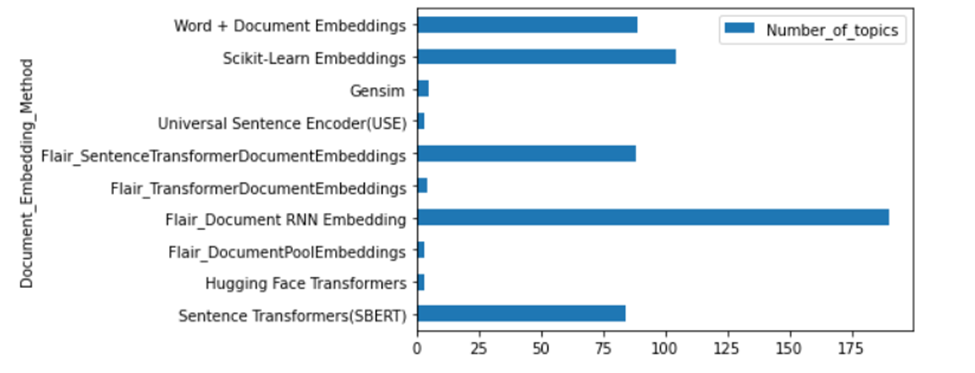